<font size=7> Burst Attempt

# Setup

In [2]:
from human_hip import spike_data
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

In [3]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

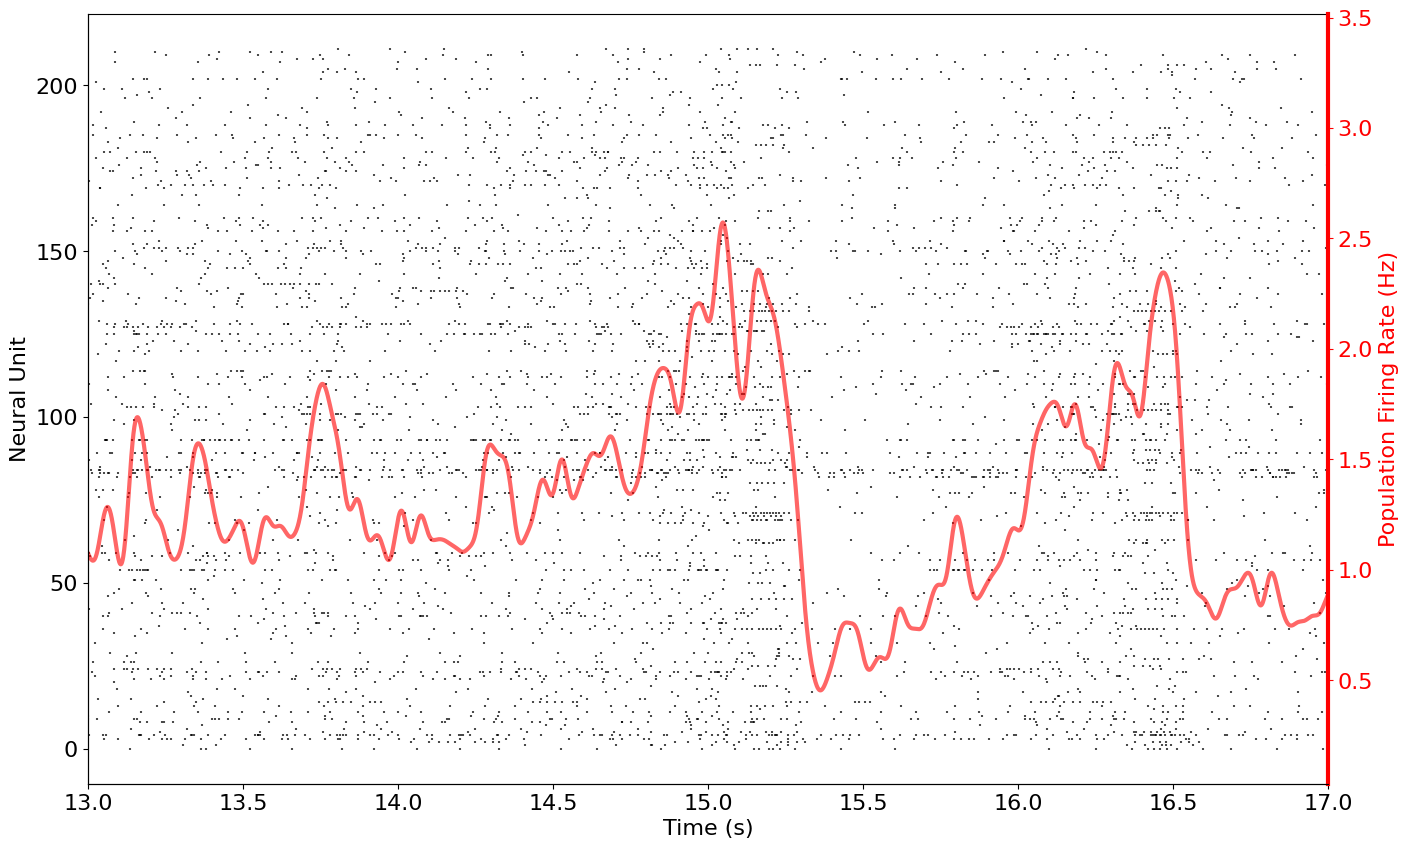

In [4]:
spike_data.plot_raster( sd, size=(16,10), xlim=(13, 17) )

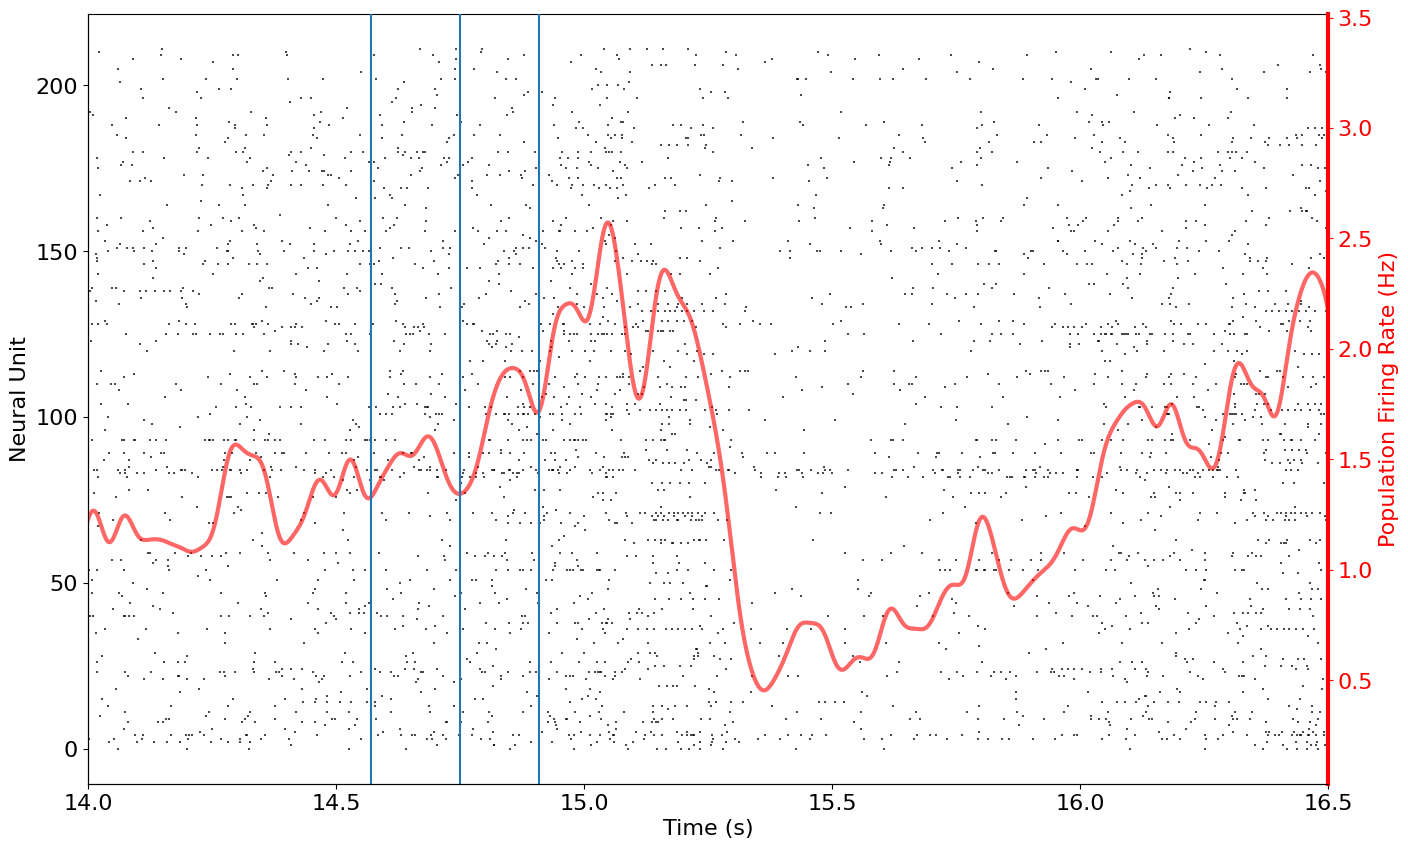

In [22]:
spike_data.plot_raster( sd, size=(16,10), xlim=(14, 16.5) )


plt.axvline(x=14.57)
plt.axvline(x=14.75)
plt.axvline(x=14.91)

In [6]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

def firing_plotter(sd):
    firing_rates = calculate_mean_firing_rates(sd)

    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.figure(figsize=(8, 6))
    plt.scatter(neuron_x, neuron_y, s=firing_rates*20 + firing_rates**1.5, alpha=0.3, c='r')
    plt.show()


# Burst comparison

**burst time difference: 0.1699 seconds**

In [7]:
14.855 - 14.685

0.16999999999999993

**burst between 14.57-14.75 seconds**

In [8]:
sd_start = sd.subtime( 14.57*1000 ,  14.75*1000 )

/tmp/ipykernel_3176/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


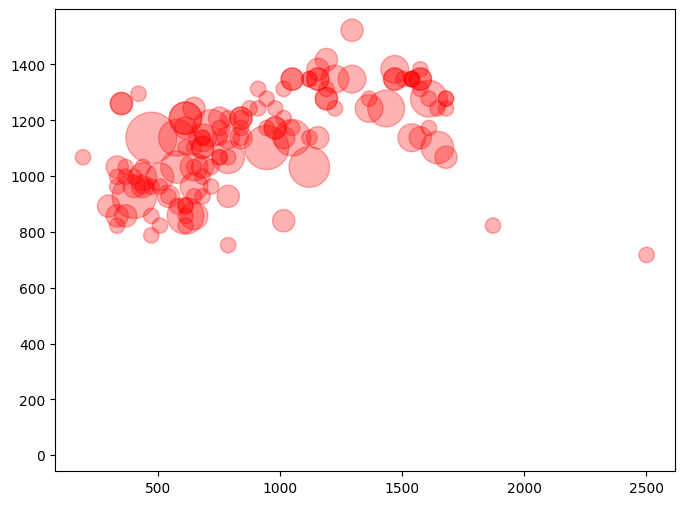

In [9]:
firing_plotter(sd_start)

**Get burst between 14.75-14.95**

In [10]:
sd_start = sd.subtime(  14.75*1000, 14.91*1000 )

/tmp/ipykernel_3176/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


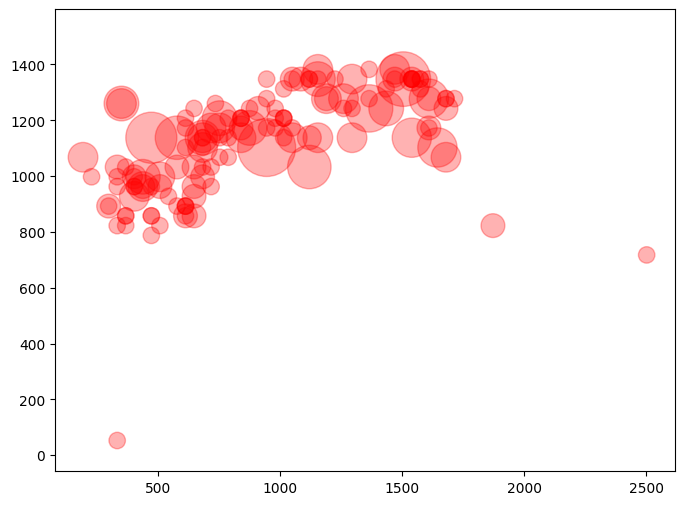

In [11]:
firing_plotter(sd_start)

# subtraction plot

In [12]:
sd1 = sd.subtime( 14.57*1000 ,  14.75*1000 )
firings_1 = calculate_mean_firing_rates(sd1)

sd2 = sd.subtime(  14.75*1000, 14.91*1000 )
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

In [13]:
print( sum(firings_diff==0), "have no change in firing rate")

46 have no change in firing rate


Text(0.5, 1.0, 'Histogram')

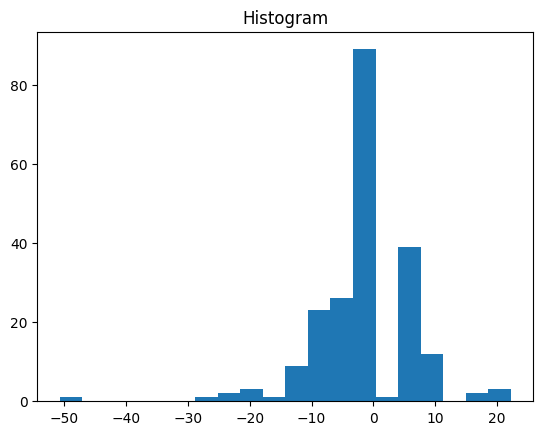

In [14]:
plt.hist(firings_diff, bins=20)#, edgecolor='black')  # You can adjust the number of bins
plt.title('Histogram')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.show()

/tmp/ipykernel_3176/2601789993.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


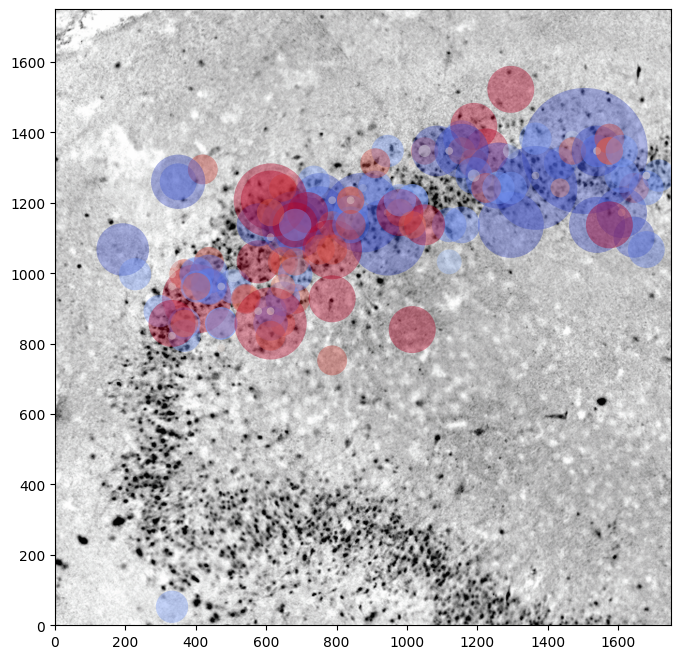

In [15]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 8))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.3)*50, alpha=0.4, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.xlim(0,1750)
plt.ylim(0,1750)
# plt.xlim(0,1750)
# plt.ylim(700,1500)
plt.show()

/tmp/ipykernel_3176/612450861.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


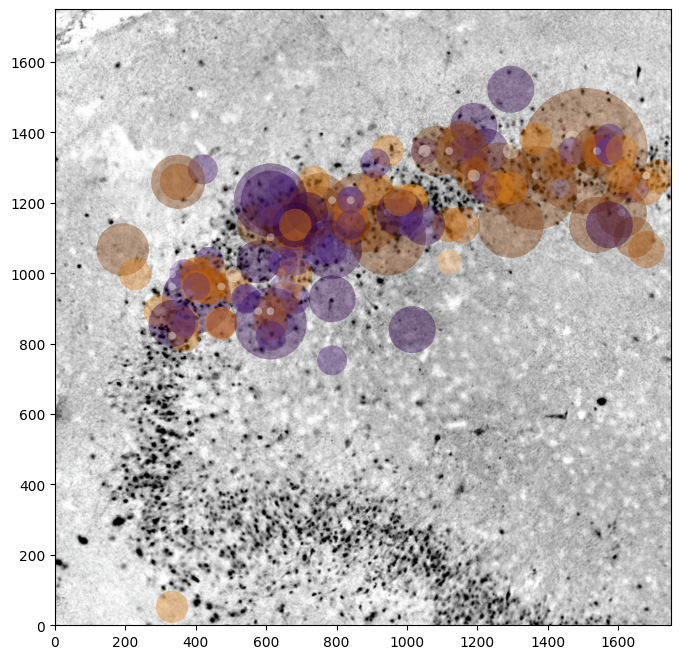

In [16]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 8))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.3)*50, alpha=0.4, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.PuOr )
plt.xlim(0,1750)
plt.ylim(0,1750)
# plt.xlim(0,1750)
# plt.ylim(700,1500)
plt.show()

In [ ]:
# img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
# plt.imshow(img,  extent=[0, 3850, 0, 2100])

/tmp/ipykernel_1059/2245385129.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


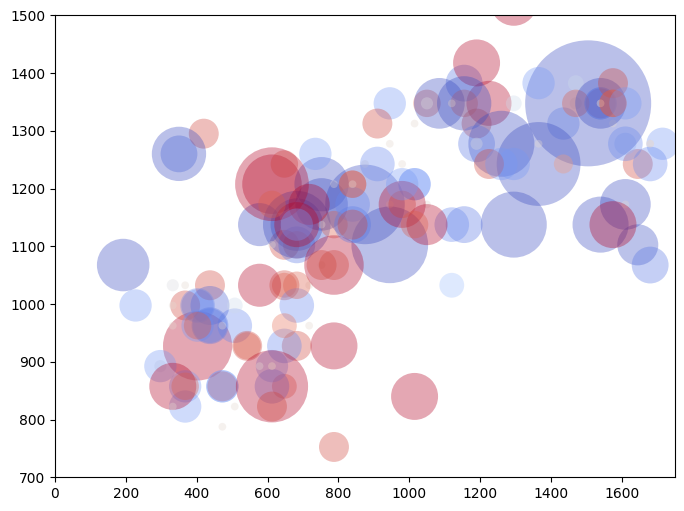

In [12]:
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
    plt.figure(figsize=(8, 6))
    plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.3)*50, alpha=0.35, c=firings_diff, edgecolor='none',
                norm=norm, cmap=cm.coolwarm )
    plt.xlim(0,1750)
    plt.ylim(700,1500)
    plt.show()


/tmp/ipykernel_1059/4249673558.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


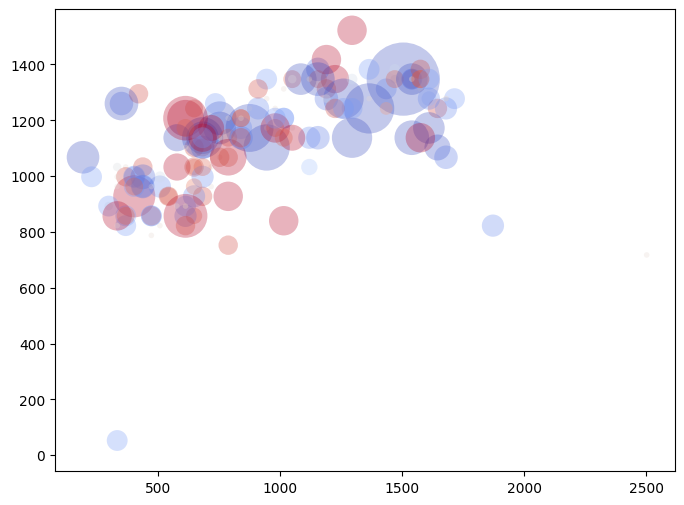

In [13]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.2)*25, alpha=0.3, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.show()


# <font color="orange"> Orange Neuron Firing Rate by Peak

In [5]:
sd1 = sd.subtime( 14.57*1000 ,  14.75*1000 )
firings_1 = calculate_mean_firing_rates(sd1)
sd2 = sd.subtime(  14.75*1000, 14.91*1000 )
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

## <font color="darkorange"> all values

In [6]:
firings_diff_1 = firings_diff.copy()
firings_diff_1[ firings_diff_1<0 ] = 0

/tmp/ipykernel_1381/3828829871.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


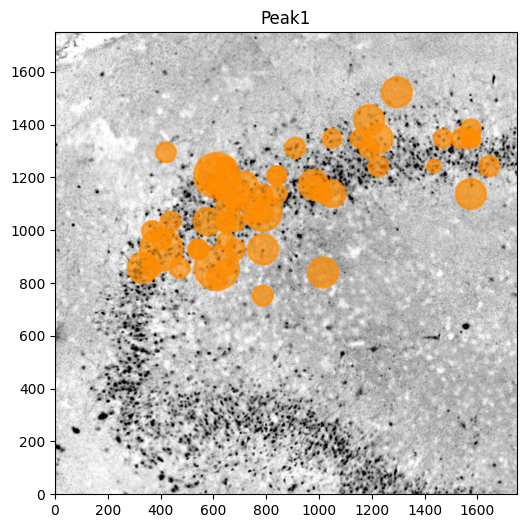

In [7]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )

plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_1)**1.2)*25, alpha=0.7,
             c="darkorange", linewidths=2) #, edge_alpha=1 ) #d cmap=cm.Oranges )
plt.title("Peak1")
plt.xlim(0,1750)
plt.ylim(0,1750)
plt.show()

In [9]:
firings_diff_2 = firings_diff.copy()
firings_diff_2[ firings_diff_2>0 ] = 0

/tmp/ipykernel_1381/339972440.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


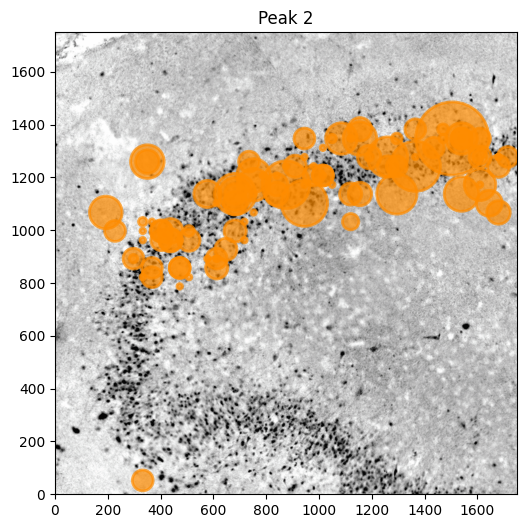

In [10]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.7,
             c="darkorange", linewidths=2)#, edge_alpha=1 ) #d cmap=cm.Oranges )
plt.title("Peak 2")
plt.xlim(0,1750)
plt.ylim(0,1750)
plt.show()

## <font color="orange"> small values removed

In [253]:
firings_diff_1 = firings_diff.copy()
firings_diff_1[ firings_diff_1<7 ] = 0

/tmp/ipykernel_2942/3828829871.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


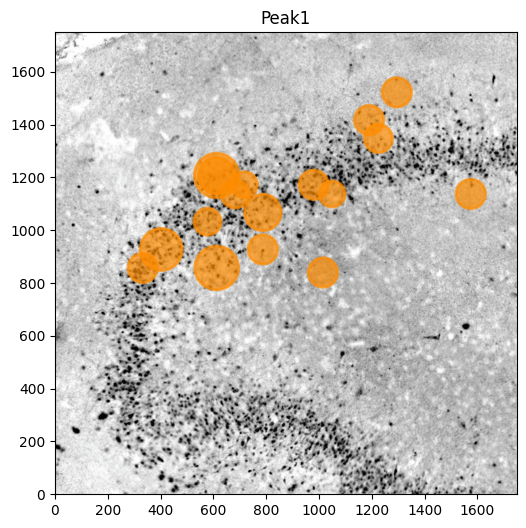

In [257]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )

plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_1)**1.2)*25, alpha=0.7,
             c="darkorange", linewidths=2) #, edge_alpha=1 ) #d cmap=cm.Oranges )
plt.title("Peak1")
plt.xlim(0,1750)
plt.ylim(0,1750)
plt.show()

In [258]:
firings_diff_2 = firings_diff.copy()
firings_diff_2[ firings_diff_2>-7 ] = 0

/tmp/ipykernel_2942/1413397430.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


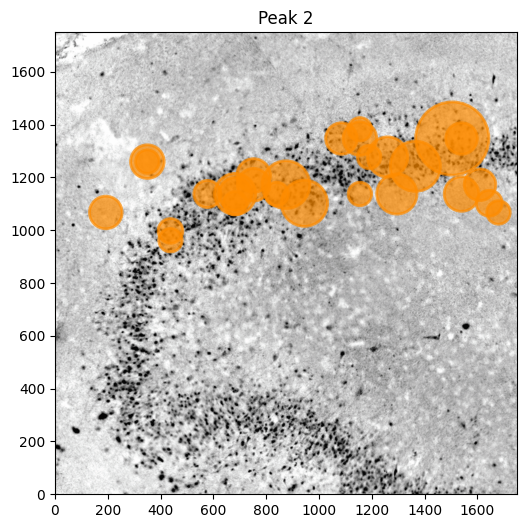

In [259]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.7,
             c="darkorange", linewidths=2)#, edge_alpha=1 ) #d cmap=cm.Oranges )
plt.title("Peak 2")
#plt.xlim(0,2000)
#plt.ylim(0,1500)
plt.xlim(0,1750)
plt.ylim(0,1750)
plt.show()

# <font color="green"> Neuron Firing Rate by Peak

In [182]:
sd1 = sd.subtime( 14.57*1000 ,  14.75*1000 )
firings_1 = calculate_mean_firing_rates(sd1)
sd2 = sd.subtime(  14.75*1000, 14.91*1000 )
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

## <font color="green"> all values

In [183]:
firings_diff_1 = firings_diff.copy()
firings_diff_1[ firings_diff_1<0 ] = 0

/tmp/ipykernel_2942/2062550507.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


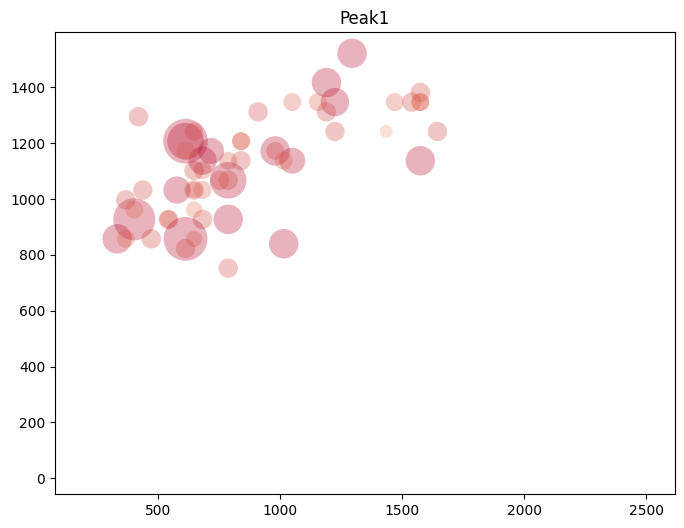

In [184]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_1)**1.2)*25, alpha=0.3, c=firings_diff_1, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.title("Peak1")
plt.show()


In [53]:
firings_diff_2 = firings_diff.copy()
firings_diff_2[ firings_diff_2>0 ] = 0

/tmp/ipykernel_2942/454475330.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


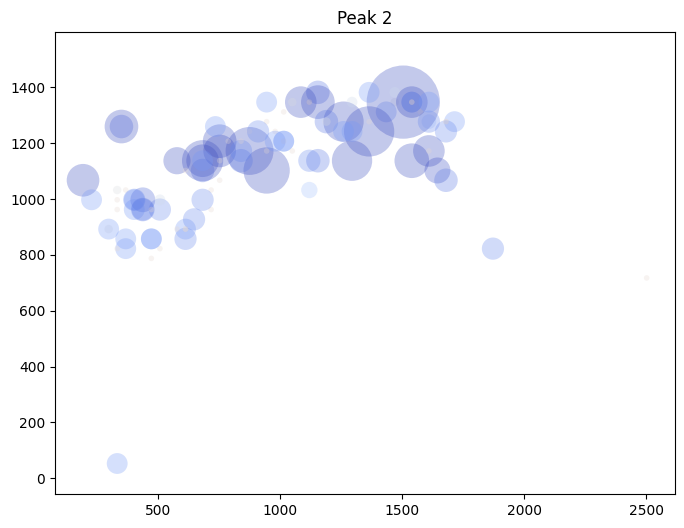

In [58]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.3, c=firings_diff_2, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.title("Peak 2")
plt.show()

## <font color="green"> small values removed

In [81]:
firings_diff_1 = firings_diff.copy()
firings_diff_1[ firings_diff_1<7 ] = 0

/tmp/ipykernel_2942/2859610565.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


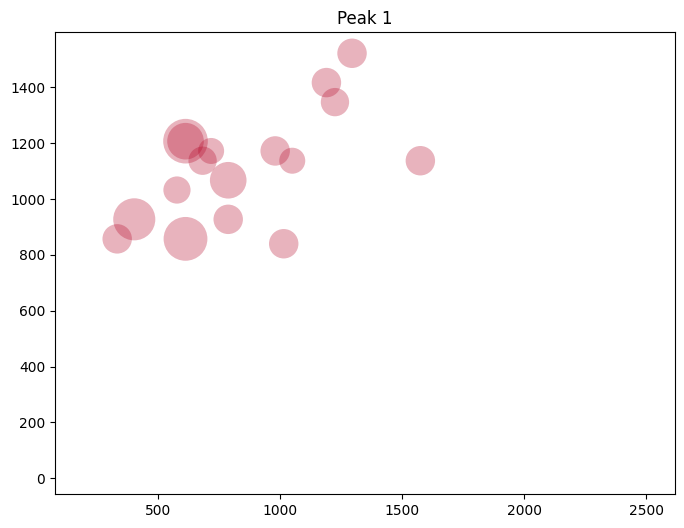

In [82]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_1)**1.2)*25, alpha=0.3, c=firings_diff_1, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.title("Peak 1")
plt.show()


In [79]:
firings_diff_2 = firings_diff.copy()
firings_diff_2[ firings_diff_2>-7 ] = 0

/tmp/ipykernel_2942/454475330.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


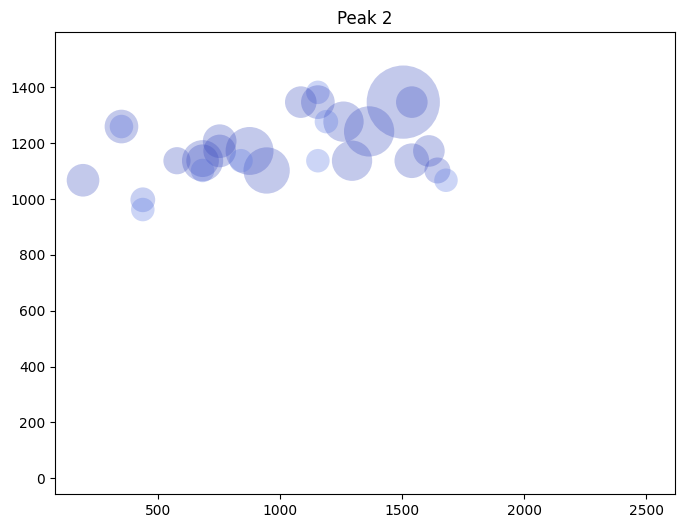

In [80]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.3, c=firings_diff_2, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.title("Peak 2")
plt.show()

# <font color="magenta">Neurons by Peak

In [13]:
sd1 = sd.subtime( 14.57*1000 ,  14.75*1000 )
firings_1 = calculate_mean_firing_rates(sd1)
sd2 = sd.subtime(  14.75*1000, 14.91*1000 )
firings_2 = calculate_mean_firing_rates(sd2)
firings_diff =  firings_1-firings_2

## <font color="magenta">all values

In [162]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
neuron_x = np.array(neuron_x)
neuron_y = np.array(neuron_y)

neuron_x = neuron_x[ firings_diff>0  ] 
neuron_y = neuron_y[ firings_diff>0  ] 

/tmp/ipykernel_2942/2549639855.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


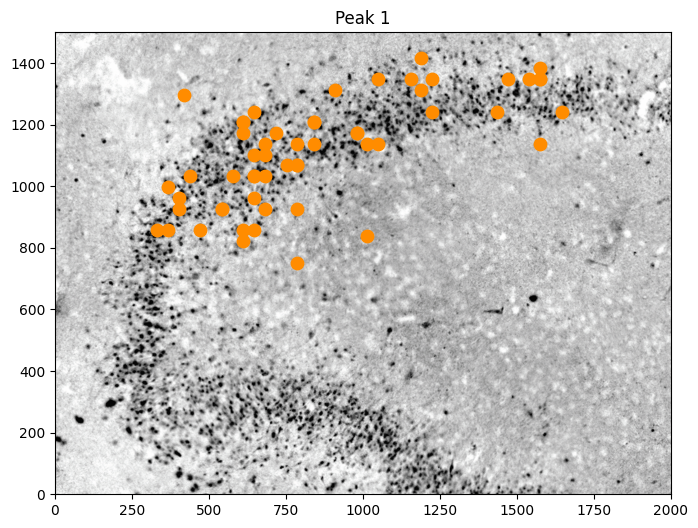

In [163]:
plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=80, c="darkorange" ) #s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.3, c=firings_diff_2, edgecolor='none', )
plt.title("Peak 1")
plt.xlim(0,2000)
plt.ylim(0,1500)
plt.show()

In [164]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
neuron_x = np.array(neuron_x)
neuron_y = np.array(neuron_y)

neuron_x = neuron_x[ firings_diff<0  ] 
neuron_y = neuron_y[ firings_diff<0  ] 

/tmp/ipykernel_2942/1777007395.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


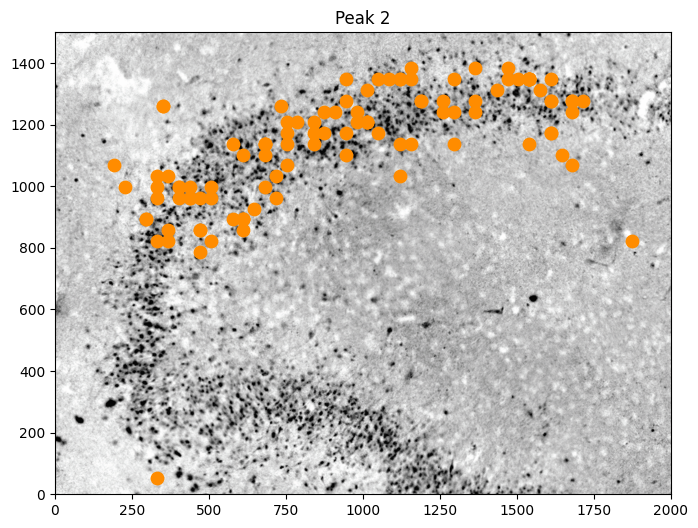

In [166]:
plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=80, c="darkorange" ) #s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.3, c=firings_diff_2, edgecolor='none', )
plt.title("Peak 2")
plt.xlim(0,2000)
plt.ylim(0,1500)
plt.show()

## <font color="magenta">small values removed

In [14]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
neuron_x = np.array(neuron_x)
neuron_y = np.array(neuron_y)

neuron_x = neuron_x[ firings_diff>7  ] 
neuron_y = neuron_y[ firings_diff>7  ] 

/tmp/ipykernel_1381/757219560.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


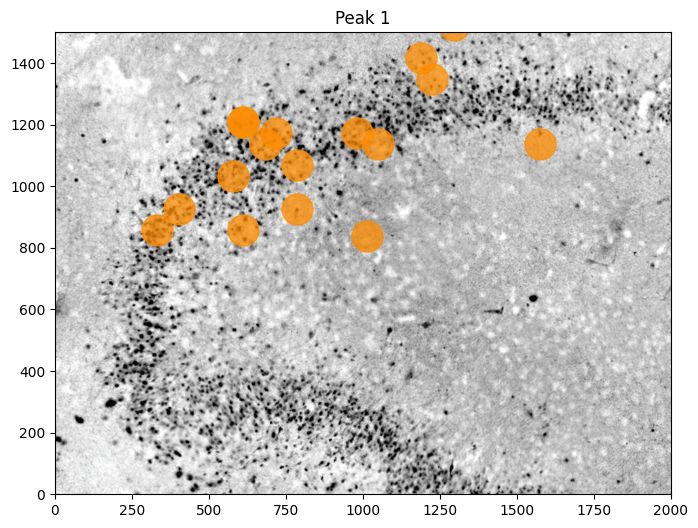

In [17]:
plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=500, alpha=.75, c="darkorange" ) #s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.3, c=firings_diff_2, edgecolor='none', )
plt.title("Peak 1")
plt.xlim(0,2000)
plt.ylim(0,1500)
plt.show()

In [18]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
neuron_x = np.array(neuron_x)
neuron_y = np.array(neuron_y)

neuron_x = neuron_x[ firings_diff<-7  ] 
neuron_y = neuron_y[ firings_diff<-7  ] 

/tmp/ipykernel_1381/3520399480.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


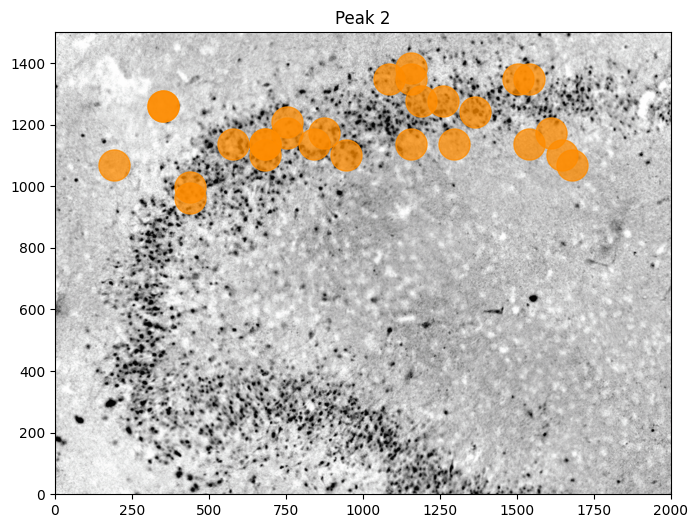

In [19]:
plt.figure(figsize=(8, 6))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=500, alpha=.75, c="darkorange" ) #s=(np.abs(firings_diff_2)**1.2)*25, alpha=0.3, c=firings_diff_2, edgecolor='none', )
plt.title("Peak 2")
plt.xlim(0,2000)
plt.ylim(0,1500)
plt.show()

# Try 2- Peak Trough Comparison

In [1]:
## plot peaks and troughs

# <font color="grey"> Peak Trough comparison 

## plot peaks and troughs

In [14]:
(14.57+14.685)/2

14.627500000000001

In [15]:
(14.855+14.91)/2

14.8825

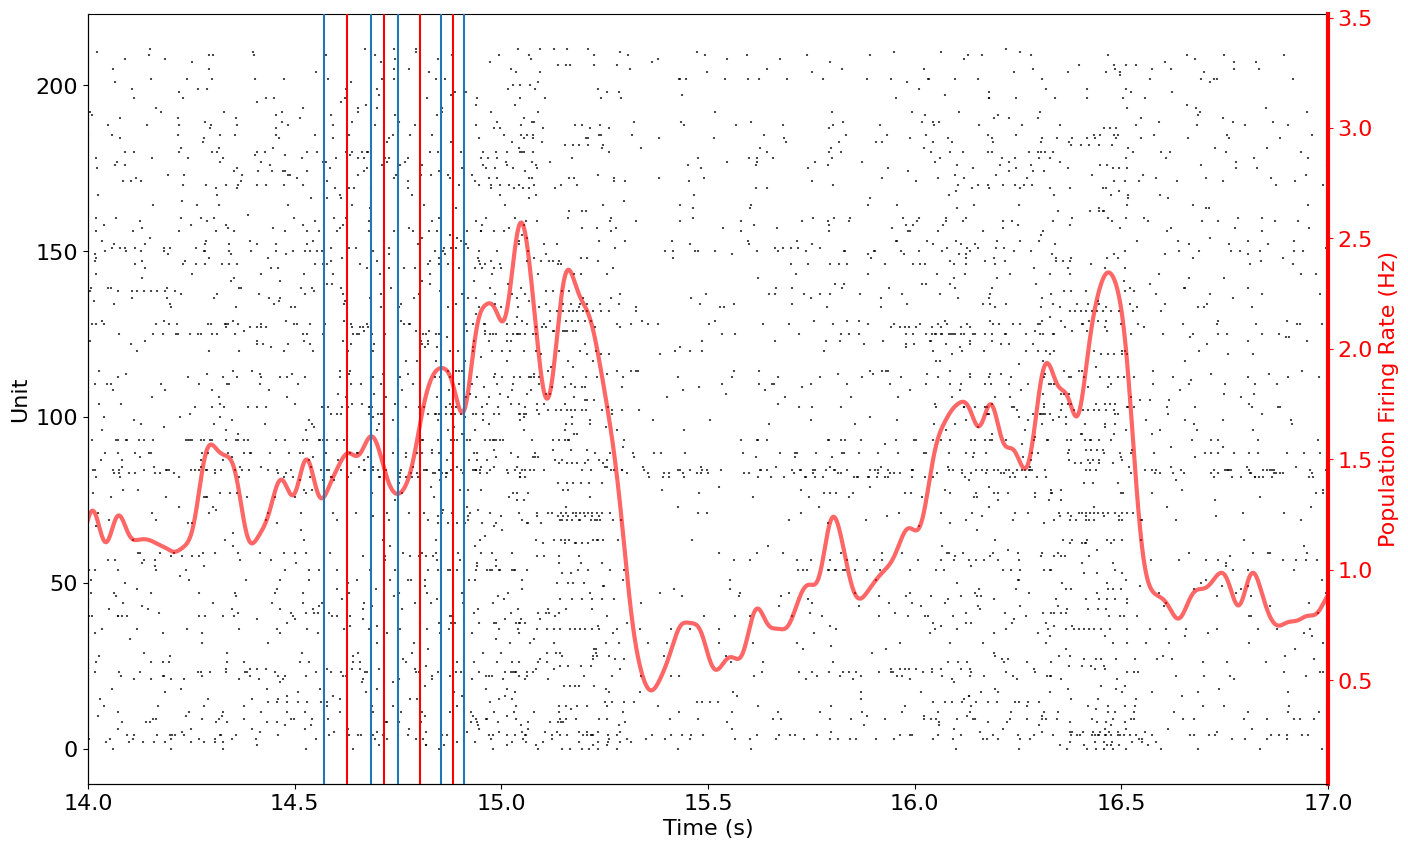

In [16]:
spike_data.plot_raster( sd, size=(16,10), xlim=(14, 17) )

plt.axvline(x=14.57)
plt.axvline(x=14.6275,c="red")
plt.axvline(x=14.685)
plt.axvline(x=14.7175,c="red")
plt.axvline(x=14.75)
plt.axvline(x=14.8025,c="red")
plt.axvline(x=14.855)
plt.axvline(x=14.8825,c="red")
plt.axvline(x=14.91)

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


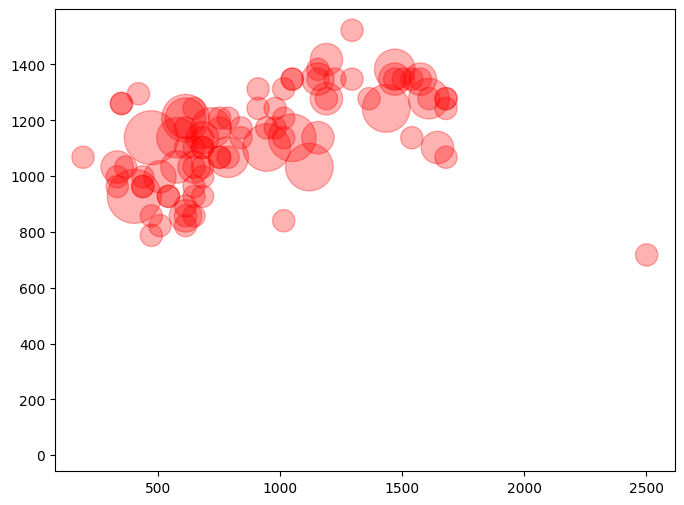

In [17]:
firing_plotter( sd.subtime(14.627*1000, 14.7175*1000) )

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


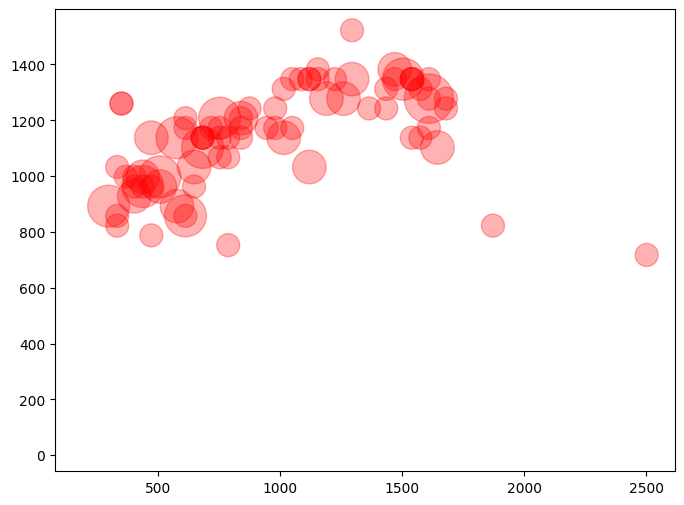

In [18]:
firing_plotter( sd.subtime(14.7175*1000, 14.8025*1000) )

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


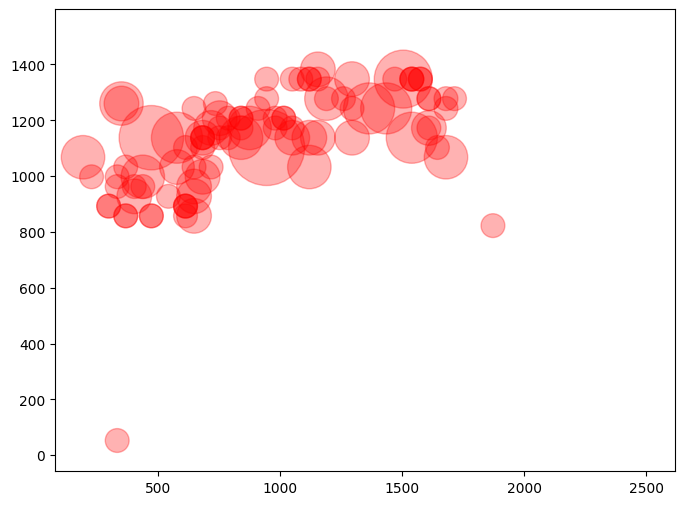

In [19]:
firing_plotter( sd.subtime(14.8025*1000, 14.8825*1000) )

## plot differences

In [24]:
sd1 = sd.subtime(14.627*1000, 14.7175*1000)
firings_1 = calculate_mean_firing_rates(sd1)

sd2 = sd.subtime(14.7175*1000, 14.8025*1000)
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

/tmp/ipykernel_1059/3900484821.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


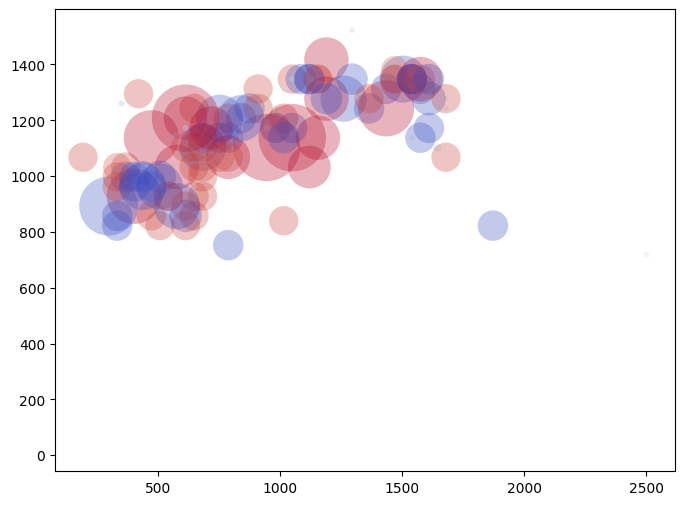

In [25]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
# img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
# plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.2)*25, alpha=0.3, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.show()


In [26]:
sd1 = sd.subtime(14.7175*1000, 14.8025*1000)
firings_1 = calculate_mean_firing_rates(sd1)

sd2 = sd.subtime(14.8025*1000, 14.8825*1000)
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

/tmp/ipykernel_1059/1301763079.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


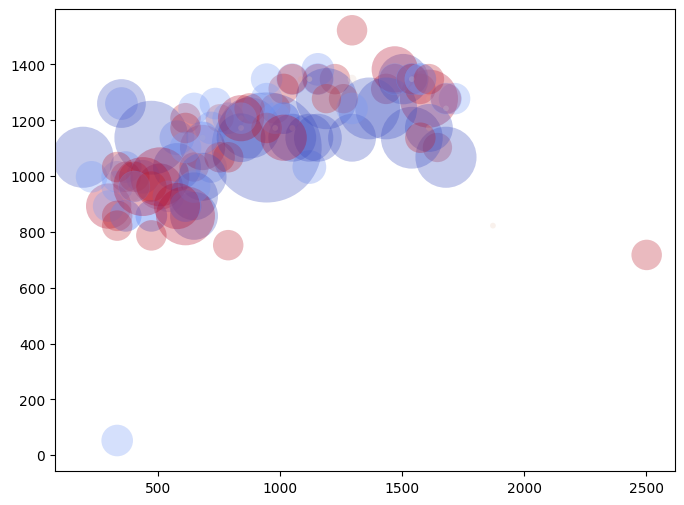

In [27]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.2)*25, alpha=0.3, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )